In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from data_provider.data_loader import Batteryloader
from data_provider.data_loader_benchmark import CIDatasetBenchmark, \
    CIAutoRegressionDatasetBenchmark
# 使用示例
root_path = 'dataset/battery/'
data_path = 'CALCE_CS2_35_label.txt'
seq_len = 50
patch_len = 10
pred_len = 10
stride = 1
# output_len = 10
label_len = 10
subset_rand_ratio = 1
timeenc = 1
freq = 'h'

flag = 'train'  # train, val, test

data_type = 'custom'

data_set = CIAutoRegressionDatasetBenchmark(
    root_path=os.path.join(root_path, data_path),
    flag=flag,
    input_len=seq_len,
    label_len=label_len,
    pred_len=pred_len,
    data_type=data_type,
    scale=True,
    timeenc=timeenc,
    freq=freq,
    stride=stride,
    subset_rand_ratio=subset_rand_ratio)




for i,(data, target,_,_) in enumerate(data_set):
    print(data.shape)
    print(target.shape)
    break

(50, 1)
(20, 1)


上采样完成，结果已保存到 dataset/battery/upsampled_CALCE_CS2_35_label.txt


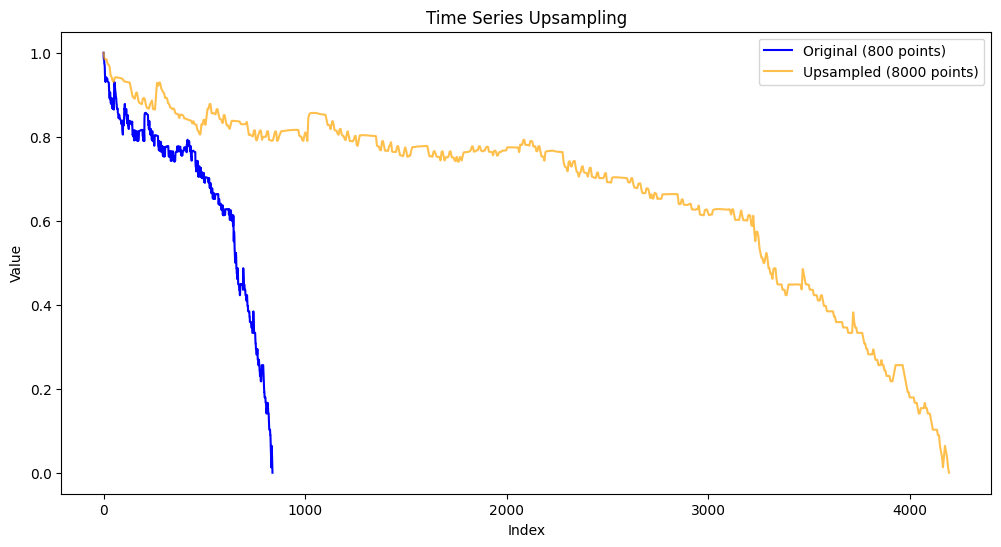

In [19]:
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

# 读取数据
def read_time_series(file_path):
    with open(file_path, 'r') as f:
        # 假设文件中的数据是以换行符分隔的一维数值
        data = np.array([float(line.strip()) for line in f])
    return data

# 上采样数据
def upsample_time_series(data, factor):
    original_indices = np.arange(len(data))
    target_indices = np.linspace(0, len(data) - 1, len(data) * factor)
    interp_func = interp1d(original_indices, data, kind='linear')
    upsampled_data = interp_func(target_indices)
    return upsampled_data

# 保存数据到txt文件
def save_time_series(data, file_path):
    np.savetxt(file_path, data, fmt='%.6f')  # 保留六位小数

file_path = 'dataset/battery/CALCE_CS2_35_label.txt'
output_file = 'dataset/battery/upsampled_CALCE_CS2_35_label.txt'
# 读取时间序列
time_series = read_time_series(file_path)


# 上采样到8000
upsampled_series = upsample_time_series(time_series, factor=5)

# 保存结果
save_time_series(upsampled_series, output_file)

print(f"上采样完成，结果已保存到 {output_file}")
# 可视化结果

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original (800 points)', color='blue')
plt.plot(upsampled_series, label='Upsampled (8000 points)', color='orange', alpha=0.7)
plt.legend()
plt.title('Time Series Upsampling')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
